In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [4]:
temp = pd.read_csv('hr_temp_20170201-20200131_subset.csv')

In [5]:
temp2 = pd.read_csv('hr_temp_20200201-20200229_subset.csv')

In [6]:
energy = pd.read_csv('hrl_load_metered - 20170201-20200131.csv')

In [7]:
energy['datetime_beginning_ept'] = pd.to_datetime(energy['datetime_beginning_ept'])

In [8]:
temp = temp.append(temp2)

In [9]:
temp['DATE'] = pd.to_datetime(temp['DATE'])

In [10]:
final = temp.join(energy, how='left')

In [11]:
final = final[['DATE','HourlyDryBulbTemperature','mw']]

In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26976 entries, 0 to 26279
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      26976 non-null  datetime64[ns]
 1   HourlyDryBulbTemperature  26939 non-null  float64       
 2   mw                        26976 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 843.0 KB


In [12]:
final['weekday'] = final['DATE'].dt.weekday
final['hour'] = final['DATE'].dt.hour
final['month'] = final['DATE'].dt.month
final['year'] = final['DATE'].dt.year

In [13]:
final.set_index('DATE', inplace=True)

In [14]:
final.interpolate('linear', inplace=True)

In [15]:
final.sort_index(inplace=True)

In [16]:
final.reset_index(inplace=True)

In [68]:
final

,DATE,HourlyDryBulbTemperature,mw,weekday,hour,month,year
0,2017-02-01 00:53:00,37.0,1419.881,2,0,2,2017
1,2017-02-01 01:53:00,37.0,1379.505,2,1,2,2017
2,2017-02-01 02:53:00,36.0,1366.106,2,2,2,2017
3,2017-02-01 03:53:00,36.0,1364.453,2,3,2,2017
4,2017-02-01 04:53:00,36.0,1391.265,2,4,2,2017
...,...,...,...,...,...,...,...
26971,2020-02-29 19:51:00,25.0,1556.454,5,19,2,2020
26972,2020-02-29 20:51:00,25.0,1528.344,5,20,2,2020
26973,2020-02-29 21:51:00,25.0,1470.758,5,21,2,2020
26974,2020-02-29 22:51:00,24.0,1398.308,5,22,2,2020


In [17]:
final.rename(columns={'DATE':'date',
            'HourlyDryBulbTemperature':'temp'}, inplace=True)

In [18]:
final = final[['date','mw','temp','hour','weekday','month','year']]

In [19]:
train = final[final['year']<=2019].copy()

In [77]:
sum(final['temp'].isnull())

0

In [20]:
test = final[final['year']>2019].copy()

In [21]:
test.to_csv('Test_Data.csv',index=False)
train.to_csv('Train_Data.csv', index=False)

## Chapter 2

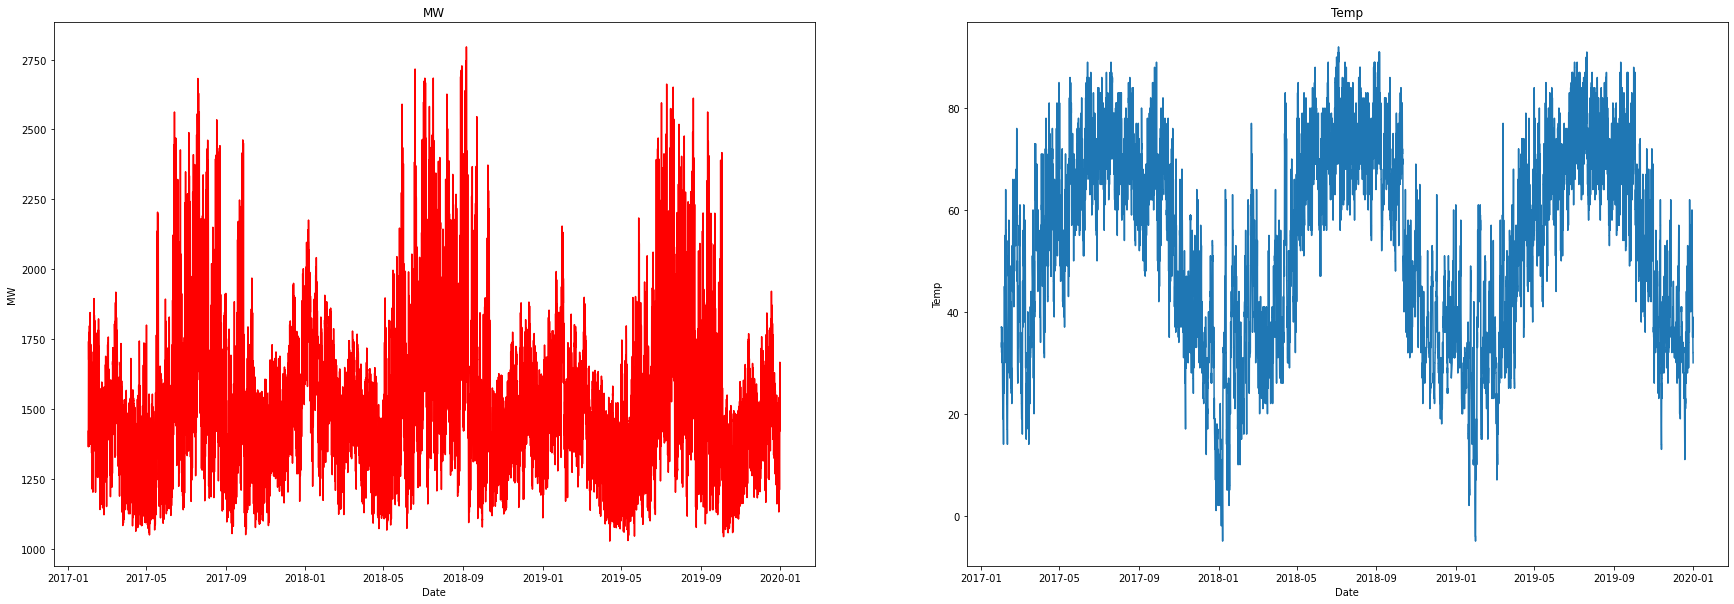

In [65]:
#plot all data

fig = plt.figure(figsize=(30, 10))

x = train['date']
y1 = train['mw']
y2 = train['temp']

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.plot(x, y1, color='red')
ax2.plot(x, y2)

ax.set_title('MW')
ax2.set_title('Temp')

ax.set_xlabel('Date')
ax2.set_xlabel('Date')

ax.set_ylabel('MW')
ax2.set_ylabel('Temp')
plt.show()

## What generic overall patterns do you notice around the seasons of the year?

### MW load is highest when temperatures are highest, but also high when temperatures are at the lowest (in winter)

In [56]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Line(x=train['date'], y=train['mw'],
					name="MW", yaxis='y'))

fig.add_trace(go.Line(x=train['date'], y=train['temp'],
						name="Temp", yaxis="y2"))



# Create axis objects
fig.update_layout(xaxis=dict(domain=[0.21, 0.79]),

				# create 1st y axis
				yaxis=dict(
	title="MW",
	titlefont=dict(color="#1f77b4"),
	tickfont=dict(color="#1f77b4"), side='right',position=.8),

	# create 2nd y axis
	yaxis2=dict(title="Temp", overlaying="y",
				side="left", position=0.2),)

fig.update_layout(
    width=2000,
    height=500
)

fig.show()


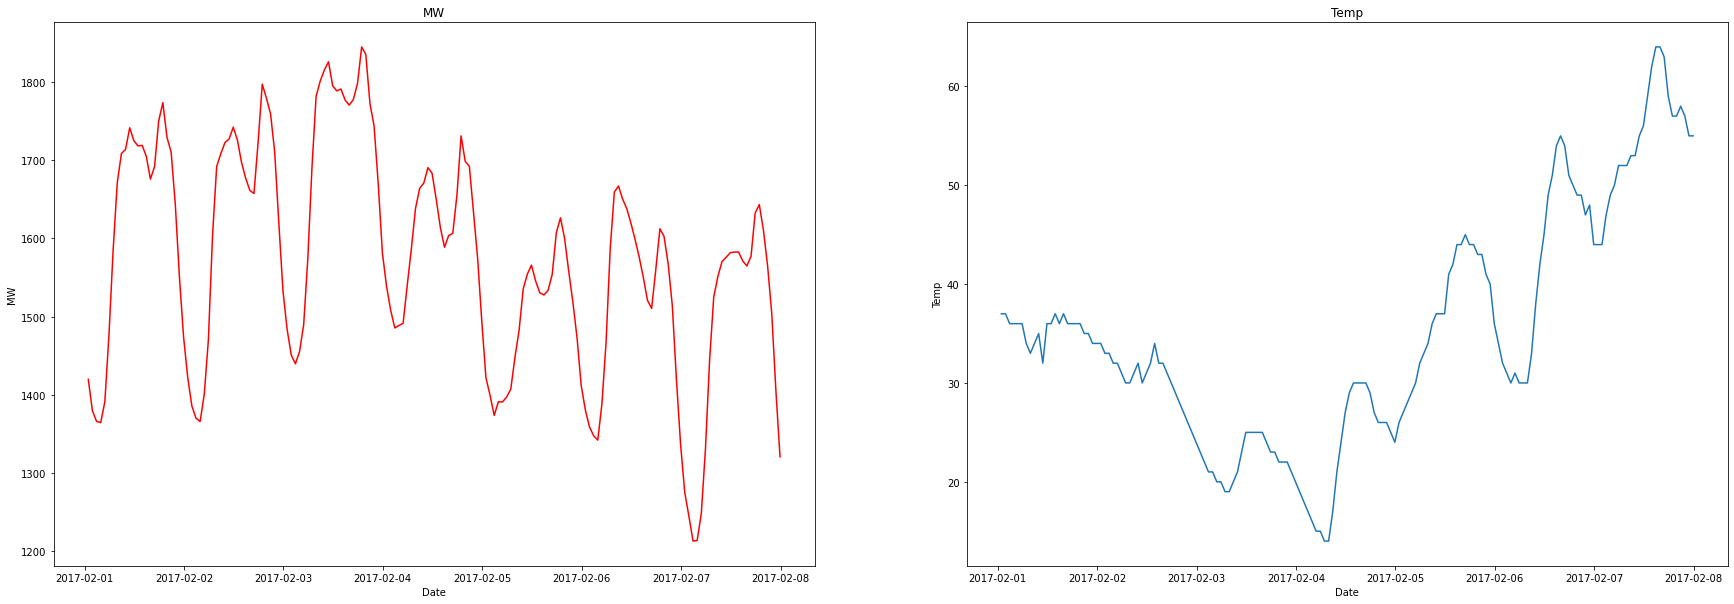

In [68]:
#plot one week

fig = plt.figure(figsize=(30, 10))

x = train['date'].head(168)
y1 = train['mw'].head(168)
y2 = train['temp'].head(168)

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.plot(x, y1, color='red')
ax2.plot(x, y2)

ax.set_title('MW')
ax2.set_title('Temp')

ax.set_xlabel('Date')
ax2.set_xlabel('Date')

ax.set_ylabel('MW')
ax2.set_ylabel('Temp')
plt.show()

## What overall patterns do you notice around a day of the week? How about hours in a day?

### There is a dip in load in the middle of the day with two peaks per day, load drops significantly overnight, over the week load starts to decrease overall as temperatures increase from lows

In [69]:
#calculate correlation

train['mw'].corr(train['temp'])

0.32753955690741215

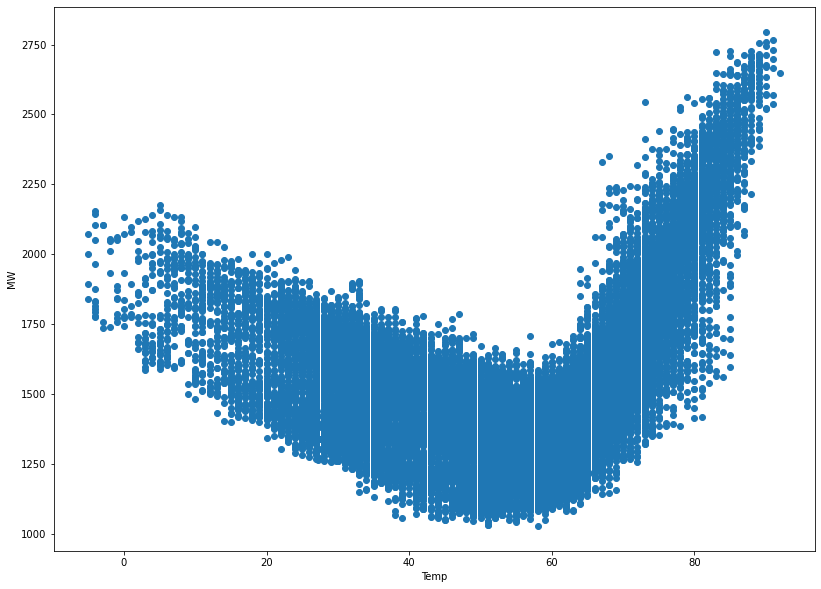

In [73]:
#plot scatter

fig = plt.figure(figsize=(30, 10))

x = train['temp']
y = train['mw']


# Adds subplot on position 1
ax = fig.add_subplot(121)


ax.scatter(x, y)

ax.set_xlabel('Temp')
ax.set_ylabel('MW')

plt.show()